**We're going to start by import the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.datasets import load_iris
import pydot
from IPython.display import Image
%matplotlib inline

**1-Exploration de la base de données**

In [2]:
house = 'C:/Users/HP/Anaconda3/Lib/site-packages/notebook/train.csv'

In [3]:
df_train = pd.read_csv(house, sep = ',')

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


** 2-Analyse de la target variable : 'SalePrice'**

In [6]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


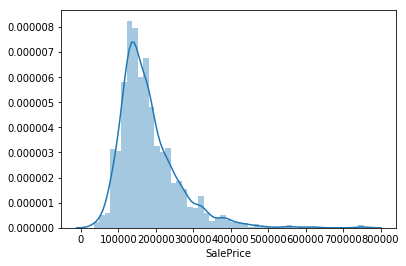

In [7]:
#Histogramme de la variable cible pour trouver s'il y a 'skewness'
sns.distplot(df_train['SalePrice'])

** On remarque une skewness positive il est préférable d'appliquer log(1+x) sur cette variable pour la rendre plus normale**

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


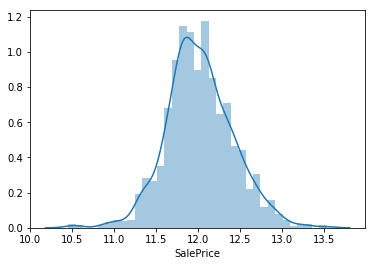

In [8]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
#La nouvelle distribution 
sns.distplot(df_train['SalePrice'] )


**3-Etudier les corrélations entre les variables**

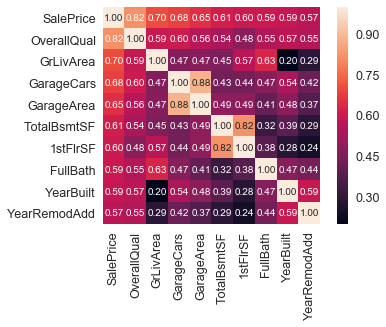

In [9]:
k = 10
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.rcParams['figure.figsize'] = ((15,5))
plt.show()

** On remarque que les variables les plus corrélées à notre variable cible sont : 'OverallQual' et 'GrdLivArea', d'autres part, il sera intéressant aussi de s'intéresser aux multicoliéarités entre les variables prédictives, par exemple 'GarageArea' et 'GarageCars' ont une corrélation très elevée ce qui est justifiée en se basant sur la dascription des variables donnée par la consigne, donc on peut garder qu'une seule, de meme pour 'TotalBsmtF' and '1stFlrSF', et pour 'TotRmsAbvGrd' and 'GrLivArea' aussi. **

**4-Les variables manquantes **

In [10]:
valid = 'C:/Users/HP/Anaconda3/Lib/site-packages/notebook/test.csv'
df_test = pd.read_csv(valid, sep = ',')

In [11]:
#Deal with multicolinearity :
df_train = df_train.drop(['1stFlrSF','GarageCars','TotRmsAbvGrd'], 1)
df_test = df_test.drop( ['1stFlrSF','GarageCars','TotRmsAbvGrd'],1)

In [12]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedP

In [13]:
print(df_train.isnull().sum())


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [14]:
print(df_test.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageArea          1
GarageQual         78
GarageCond

In [15]:
def log_rmse(yhat, ytrue):
    return np.sqrt(mean_squared_error ( np.log(yhat), np.log(ytrue) ))




In [16]:
print("\n -- RMSE test {:.4f}".format(log_rmse(Y_test, yhat_test)  ))
print("\n -- RMSE train {:.4f}".format(log_rmse(Y_train, yhat_train)))

NameError: name 'Y_test' is not defined

** On fait l'hypothèse que si le porcentage de valeurs manquantes est supérieur à 50 pourcent, on supprime cette colonne **

In [17]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [18]:
df_train = df_train.drop((missing_data[missing_data['Percent'] > 50 ]).index,1)
df_train.isnull().sum().sort_values(ascending=False)

FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
RoofStyle          0
Exterior2nd        0
Exterior1st        0
YearBuilt          0
ExterQual          0
ExterCond          0
Foundation         0
YearRemodAdd       0
SalePrice          0
OverallCond        0
OverallQual        0
HouseStyle         0
BldgType           0
Condition1         0
                ... 
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
Fireplaces         0
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr 

In [19]:
df_test= df_test.drop((missing_data[missing_data['Percent'] > 50 ]).index,1)
df_test.isnull().sum().sort_values(ascending=False)

FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
SaleType           1
TotalBsmtSF        1
Exterior1st        1
BsmtUnfSF          1
GarageArea         1
KitchenQual        1
HouseStyle         0
MSSubClass         0
                ... 
OverallCond        0
OverallQual        0
Condition2         0
SaleCondition      0
ExterQual          0
ExterCond          0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
Fireplaces   

**Compléter les valeurs numériques manquantes par la moyenne **

In [20]:
#Complete missing values for numerical variables with the mean values : 
numerical_features = df_train.select_dtypes(exclude=['object']).columns
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
 N = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
for col in N:
        df_train[col].fillna(np.mean(df_train[col]), inplace = True)
        df_test[col].fillna(np.mean(df_test[col]), inplace = True)


**Remplacer les valeurs manquantes pour les variables catégorielles par des : None **

In [22]:
categorical_features = df_train.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [23]:
C = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
for col in C:
        df_train[col].fillna('None', inplace = True)
        df_test[col].fillna('None', inplace = True)



In [24]:
#Label encoding
# Join the two datasets before encoding 
df_join = pd.concat([df_train,df_test])
for col in C:
    le = LabelEncoder()
    le.fit(df_join[col])
    df_train[col] = le.transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


**5-Tester les différents modèles**

In [26]:
Y = df_train['SalePrice'] 
X = df_train.drop(['SalePrice'], 1)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [28]:
clf = RandomForestRegressor(n_estimators=1000 )
param_grid = {"max_depth": [3,6, 9, 12],
                  "min_samples_split": [2, 3, 5]}


In [29]:
gs = GridSearchCV(clf, param_grid=param_grid, cv=3, verbose = 2)

In [30]:
gs.fit(X,Y)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=3, min_samples_split=2 ................................
[CV] ................. max_depth=3, min_samples_split=2, total=   3.8s
[CV] max_depth=3, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV] ................. max_depth=3, min_samples_split=2, total=   3.7s
[CV] max_depth=3, min_samples_split=2 ................................
[CV] ................. max_depth=3, min_samples_split=2, total=   3.5s
[CV] max_depth=3, min_samples_split=3 ................................
[CV] ................. max_depth=3, min_samples_split=3, total=   3.5s
[CV] max_depth=3, min_samples_split=3 ................................
[CV] ................. max_depth=3, min_samples_split=3, total=   3.5s
[CV] max_depth=3, min_samples_split=3 ................................
[CV] ................. max_depth=3, min_samples_split=3, total=   3.7s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] ................. max_depth=3, min_samples_split=5, total=   3.5s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] ................. max_depth=3, min_samples_split=5, total=   3.5s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 6, 9, 12], 'min_samples_split': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [34]:
yhat_train = gs.best_estimator_.predict(X_train)
yhat_test = gs.best_estimator_.predict(X_test)

In [35]:
Train_score = np.sqrt(mean_squared_error(yhat_train, Y_train))
Test_score = np.sqrt(mean_squared_error(yhat_test, Y_test))

In [36]:
 print("test {:.4f} train {:.4f} ".format(Test_score, Train_score))


test 0.0533 train 0.0549 


In [988]:
X_valid = df_test[C+N]
yhat_valid = gs.best_estimator_.predict(X_valid)
yhat_valid = np.exp(yhat_valid) -1



In [984]:
results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] =yhat_valid
results.to_csv("submission_RFNew.csv", index = False)


** Après avoir construit le modèle du Random forest, je vais essayer le modèle SVR (Support Vector Regression)**

In [37]:
clf1 = SVR()

In [38]:
clf1.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
yhat_train1 = clf1.predict(X_train)
yhat_test1 = clf1.predict(X_test)

In [40]:
#Scoring
Train_score1 = np.sqrt(mean_squared_error(yhat_train1, Y_train))
Test_score1 = np.sqrt(mean_squared_error(yhat_test1, Y_test))

In [41]:
print("test {:.4f} train {:.4f} ".format(Test_score1, Train_score1))


test 0.3778 train 0.1007 


** On remarque un overfitting du modèle**

In [42]:
#Validation dans la base de données test 
X_valid = df_test
yhat_valid1 = clf1.predict(X_valid)
yhat_valid1= np.exp(yhat_valid1) -1



In [43]:
#Submit :
results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] =yhat_valid1
results.to_csv("submission_LR5.csv", index = False)

In [44]:
#Lasso model 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [45]:
lasso.fit(X_train,Y_train)
yhat_train2 = lasso.predict(X_train)
yhat_test2 = lasso.predict(X_test)

In [46]:
Train_score2 = np.sqrt(mean_squared_error(yhat_train2, Y_train))
Test_score2 = np.sqrt(mean_squared_error(yhat_test2, Y_test))

In [47]:
print("test {:.4f} train {:.4f} ".format(Test_score2, Train_score2))


test 0.2050 train 0.1238 


** Le score sur kaggle pour ce modèle est : 0.12666 avec un classement de 1503 ** 

In [48]:
#Validation dans la base de données test 
X_valid = df_test
yhat_valid2 = lasso.predict(X_valid)
yhat_valid2= np.exp(yhat_valid2) -1

In [50]:
results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] =yhat_valid2
results.to_csv("submission_Lasso.csv", index = False)


In [52]:
#Elastic net :

#Shuffle dataframe: 
df_train= df_train.sample(frac=1)
df_test = df_test.sample(frac=1)


In [53]:
#Refaire le split du dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [66]:
#Construire le modèle :
from sklearn  import linear_model
EN = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, Y_train)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

In [67]:
#Fit the model : 
EN.fit(X_train,Y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [68]:
yhat_train3 = EN.predict(X_train)
yhat_test3 = EN.predict(X_test)

In [69]:
Train_score3 = np.sqrt(mean_squared_error(yhat_train3, Y_train))
Test_score3 = np.sqrt(mean_squared_error(yhat_test3, Y_test))

In [70]:
print("test {:.4f} train {:.4f} ".format(Test_score3, Train_score3))


test 0.1456 train 0.1360 


In [71]:
#Validation dans la base de données test 
X_valid = df_test
yhat_valid3 = EN.predict(X_valid)
yhat_valid3= np.exp(yhat_valid3) -1

In [72]:
results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] =yhat_valid3
results.to_csv("submission_ENET.csv", index = False)


In [87]:
yhat_validAvg =np.exp(lasso.predict(X_valid)) +np.exp(EN.predict(X_valid))  -2

In [88]:
yhat_validAvg= yhat_validAvg/2

In [89]:
results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] =yhat_validAvg
results.to_csv("submission_Avg2.csv", index = False)


** Cette technique n'as pas permis de minimiser les erreurs, ainsi j'opte pour le modèle Lasso vu qu'il présente moins d'erreurs sur la prédiction**